In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import svm
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


In [3]:
# concatenation of both files 
# df_train = pd.read_csv('extracted_features_hog_95.csv',header=None)

# df_train = df_train.astype(str)


# # Convert all columns to string type
# df_train[0]=df_train[0].str.split(',',expand=True)
# # print(df)


# df_test = pd.read_csv('extracted_features_test_hog_95.csv',header=None)


# df_test = df_test.astype(str)

# # Convert all columns to string type
# df_test[0]=df_test[0].str.split(',',expand=True)

# # print(df_test)


# df=pd.concat([df_train,df_test],axis=0).reset_index(drop=True)

# print(df.shape)




(13233, 3249)


In [2]:
df = pd.read_csv('hog_95(complete).csv',header=None)
print(df.shape)

# df = df.astype(str)

(13234, 3249)


In [4]:
n_c=df[0].value_counts()

In [7]:
mask_70=df[0].isin(n_c[n_c>70].index)
df_70=df[mask_70]
print(df_70.shape)

(1288, 3249)


In [5]:
filtered_name_counts=n_c[n_c>70]
sorted_filtered_names_counts=filtered_name_counts.sort_values(ascending=False)
print(sorted_filtered_names_counts)

0
George_W_Bush        530
Colin_Powell         236
Tony_Blair           144
Donald_Rumsfeld      121
Gerhard_Schroeder    109
Ariel_Sharon          77
Hugo_Chavez           71
Name: count, dtype: int64


In [8]:
X=df_70.iloc[:, 1:]
y=df_70.iloc[:,0]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
X_train.shape

(1030, 3248)

In [9]:
y_train[:10]

7220           Hugo_Chavez
10438        George_W_Bush
13180      Donald_Rumsfeld
6605          Colin_Powell
10861           Tony_Blair
7326          Colin_Powell
12138           Tony_Blair
4728          Colin_Powell
5283     Junichiro_Koizumi
10296         Colin_Powell
Name: 0, dtype: object

In [10]:
scaler=StandardScaler()
X_train_arr=X_train.values
X_test_arr=X_test.values
X_train_scaled=scaler.fit_transform(X_train_arr)
X_test_scaled = scaler.transform(X_test_arr)

In [39]:
print(X_train.shape)

(1030, 3248)


In [40]:
def model(X_train, i, featr, param_type=None):
    
    # Splitting X_train into training and validation subsets
    X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    if param_type == 'max_depth':
        clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    elif param_type == 'min_samples_split':
        clf = DecisionTreeClassifier(min_samples_split=i, random_state=42)
    elif param_type == 'min_samples_leaf':
        clf = DecisionTreeClassifier(min_samples_leaf=i, random_state=42)
    elif param_type == 'max_leaf_nodes':
        clf = DecisionTreeClassifier(max_leaf_nodes=i, random_state=42)
    else:
        clf = DecisionTreeClassifier(max_depth=None, random_state=42)
    
    clf.fit(X_train_sub, y_train_sub)

    # Predict on the validation data
    y_val_pred = clf.predict(X_val)

    # Compute accuracy on validation data
    accuracy = accuracy_score(y_val, y_val_pred)

    print(f"Accuracy using feature of {featr}:", accuracy)

    tree_depth = clf.tree_.max_depth

    print("Depth of the decision tree:", tree_depth)


    # joblib.dump(clf,f'{featr}.joblib')  ## not saving the model ##

In [41]:
# find the max_depth
model(X_train_scaled,None,'test')

Accuracy using feature of test: 0.5145631067961165
Depth of the decision tree: 17


In [42]:
# for max_depth idea
for i in range(1,18,2):
    model(X_train_scaled,i,f'max_depth_{i}','max_depth')

Accuracy using feature of max_depth_1: 0.529126213592233
Depth of the decision tree: 1
Accuracy using feature of max_depth_3: 0.5097087378640777
Depth of the decision tree: 3
Accuracy using feature of max_depth_5: 0.5776699029126213
Depth of the decision tree: 5
Accuracy using feature of max_depth_7: 0.5679611650485437
Depth of the decision tree: 7
Accuracy using feature of max_depth_9: 0.5048543689320388
Depth of the decision tree: 9
Accuracy using feature of max_depth_11: 0.5097087378640777
Depth of the decision tree: 11
Accuracy using feature of max_depth_13: 0.4854368932038835
Depth of the decision tree: 13
Accuracy using feature of max_depth_15: 0.5145631067961165
Depth of the decision tree: 15
Accuracy using feature of max_depth_17: 0.5145631067961165
Depth of the decision tree: 17


In [43]:
for i in range(2,1030,50):
        model(X_train_scaled,i,f'max_leaf_node {i}','max_leaf_nodes')

Accuracy using feature of max_leaf_node 2: 0.529126213592233
Depth of the decision tree: 1
Accuracy using feature of max_leaf_node 52: 0.558252427184466
Depth of the decision tree: 10
Accuracy using feature of max_leaf_node 102: 0.5194174757281553
Depth of the decision tree: 17
Accuracy using feature of max_leaf_node 152: 0.5194174757281553
Depth of the decision tree: 17
Accuracy using feature of max_leaf_node 202: 0.5145631067961165
Depth of the decision tree: 17
Accuracy using feature of max_leaf_node 252: 0.5145631067961165
Depth of the decision tree: 17
Accuracy using feature of max_leaf_node 302: 0.5145631067961165
Depth of the decision tree: 17
Accuracy using feature of max_leaf_node 352: 0.5145631067961165
Depth of the decision tree: 17
Accuracy using feature of max_leaf_node 402: 0.5145631067961165
Depth of the decision tree: 17
Accuracy using feature of max_leaf_node 452: 0.5145631067961165
Depth of the decision tree: 17
Accuracy using feature of max_leaf_node 502: 0.514563106

In [44]:
# for min_sample_split
for i in range(2,1030,50):
    model(X_train_scaled,i,f'min_sample_split {i}','min_samples_split')

Accuracy using feature of min_sample_split 2: 0.5145631067961165
Depth of the decision tree: 17
Accuracy using feature of min_sample_split 52: 0.5194174757281553
Depth of the decision tree: 17
Accuracy using feature of min_sample_split 102: 0.5242718446601942
Depth of the decision tree: 17
Accuracy using feature of min_sample_split 152: 0.49029126213592233
Depth of the decision tree: 17
Accuracy using feature of min_sample_split 202: 0.49514563106796117
Depth of the decision tree: 13
Accuracy using feature of min_sample_split 252: 0.5485436893203883
Depth of the decision tree: 4
Accuracy using feature of min_sample_split 302: 0.49514563106796117
Depth of the decision tree: 3
Accuracy using feature of min_sample_split 352: 0.4854368932038835
Depth of the decision tree: 2
Accuracy using feature of min_sample_split 402: 0.4854368932038835
Depth of the decision tree: 2
Accuracy using feature of min_sample_split 452: 0.529126213592233
Depth of the decision tree: 1
Accuracy using feature of 

In [45]:
# min_samples_leaf
for i in range(1,1030,50):
    model(X_train_scaled,i,f'min_samples_leaf{i}','min_samples_leaf')

Accuracy using feature of min_samples_leaf1: 0.5145631067961165
Depth of the decision tree: 17
Accuracy using feature of min_samples_leaf51: 0.5679611650485437
Depth of the decision tree: 5
Accuracy using feature of min_samples_leaf101: 0.558252427184466
Depth of the decision tree: 3
Accuracy using feature of min_samples_leaf151: 0.5097087378640777
Depth of the decision tree: 2
Accuracy using feature of min_samples_leaf201: 0.5194174757281553
Depth of the decision tree: 2
Accuracy using feature of min_samples_leaf251: 0.529126213592233
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf301: 0.529126213592233
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf351: 0.529126213592233
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf401: 0.5339805825242718
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf451: 0.46601941747572817
Depth of the decision tree: 0
Accuracy using feature of min_samples_leaf501

In [46]:
# grid decided based on the basis of around values of best accuracies calculated in the domain of possible values now going around that values to find the best hyperparameter
def tuning_model(X_train,featr,param_grid):
    clf = DecisionTreeClassifier(random_state=42)

    # Initialize GridSearchCV
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    cv_results = grid_search.cv_results_
    

    print("Grid Search Results: ")


    for i, (rank,mean_score, params) in enumerate(zip(cv_results['rank_test_score'],cv_results["mean_test_score"], cv_results["params"]), start=1):
        print(f"{i}). Rank_score: {rank}, Mean accuracy: {mean_score:.3f}, Parameters: {params}")
    # Print the best hyperparameters
    print("Best Hyperparameters:", grid_search.best_params_)

    # Print the best score
    print("Best Score:", grid_search.best_score_)

    # Save the best trained model using joblib
    best_clf = grid_search.best_estimator_

    
    joblib.dump(best_clf, f"tuned_dt_{featr}.joblib")

    return cv_results,best_clf

In [47]:
param_grid = {
        'max_depth': [5,6,7],
        'max_leaf_nodes':[40,50,70,90],
        'min_samples_split': [60,80,110],
        'min_samples_leaf': [60,80,110,120],
        
    }


In [48]:
cv_results,best_clf=tuning_model(X_train_scaled,'conc_70_gd',param_grid)

Grid Search Results: 
1). Rank_score: 1, Mean accuracy: 0.516, Parameters: {'max_depth': 5, 'max_leaf_nodes': 40, 'min_samples_leaf': 60, 'min_samples_split': 60}
2). Rank_score: 1, Mean accuracy: 0.516, Parameters: {'max_depth': 5, 'max_leaf_nodes': 40, 'min_samples_leaf': 60, 'min_samples_split': 80}
3). Rank_score: 1, Mean accuracy: 0.516, Parameters: {'max_depth': 5, 'max_leaf_nodes': 40, 'min_samples_leaf': 60, 'min_samples_split': 110}
4). Rank_score: 37, Mean accuracy: 0.505, Parameters: {'max_depth': 5, 'max_leaf_nodes': 40, 'min_samples_leaf': 80, 'min_samples_split': 60}
5). Rank_score: 37, Mean accuracy: 0.505, Parameters: {'max_depth': 5, 'max_leaf_nodes': 40, 'min_samples_leaf': 80, 'min_samples_split': 80}
6). Rank_score: 37, Mean accuracy: 0.505, Parameters: {'max_depth': 5, 'max_leaf_nodes': 40, 'min_samples_leaf': 80, 'min_samples_split': 110}
7). Rank_score: 109, Mean accuracy: 0.498, Parameters: {'max_depth': 5, 'max_leaf_nodes': 40, 'min_samples_leaf': 110, 'min_sam

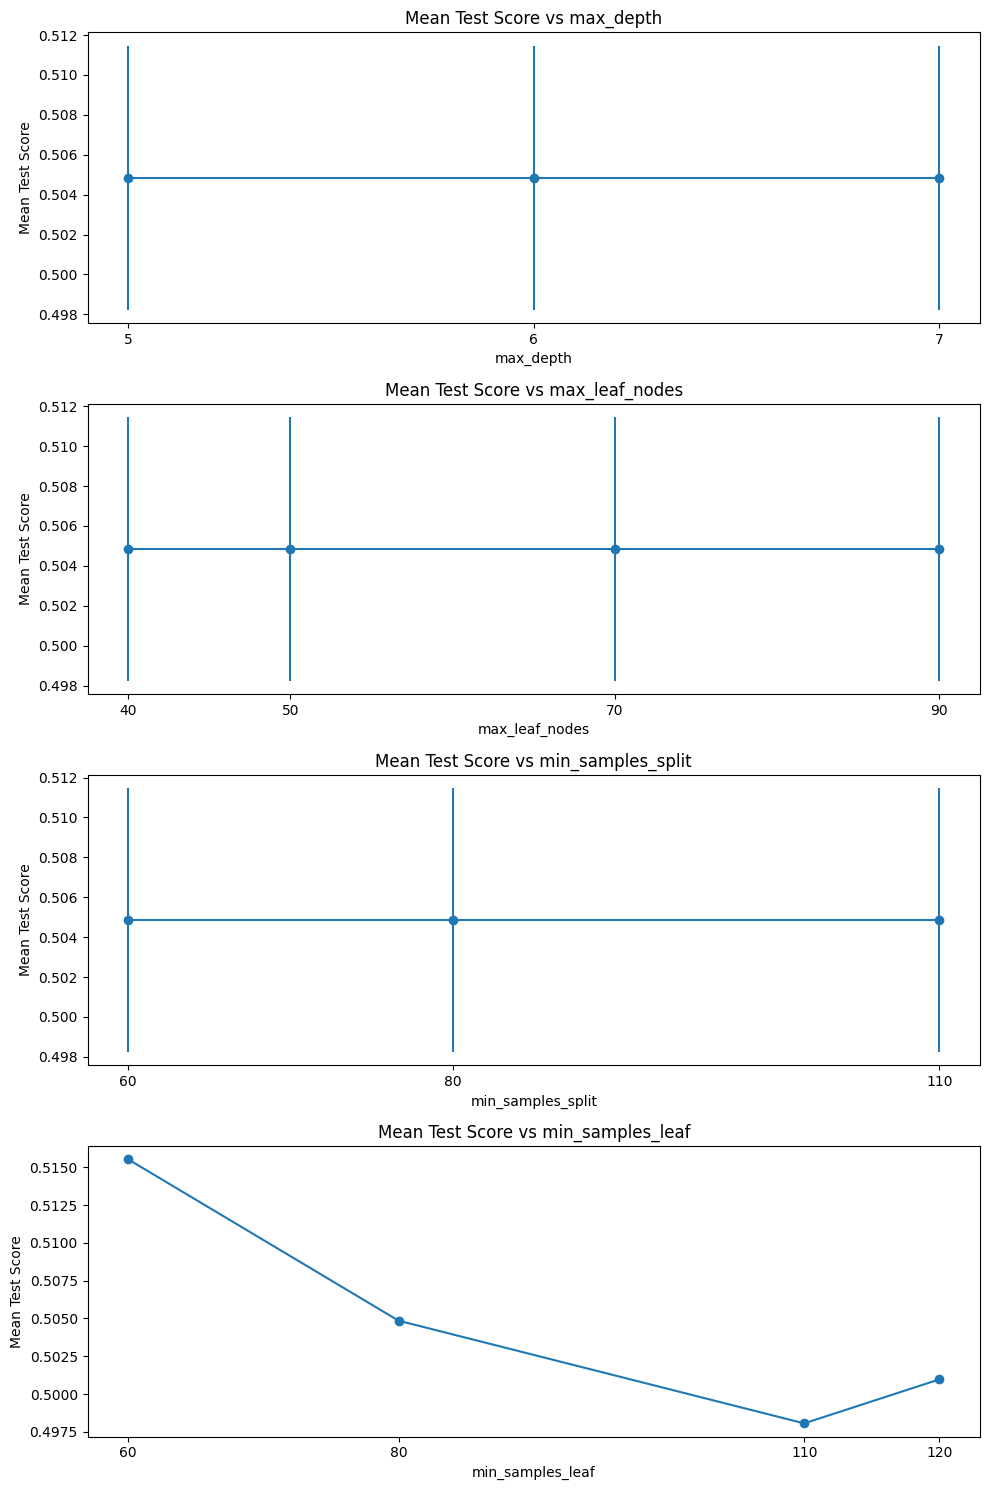

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant data from cv_results
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']
params = cv_results['params']

# Create separate plots for each hyperparameter
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, param_name in enumerate(param_grid.keys()):
    param_values = [params[j][param_name] for j in range(len(params))]
    
    # Convert None values to a placeholder that can be sorted
    param_values = [x if x is not None else -1 for x in param_values]
    
    param_values_unique = np.unique(param_values)
    mean_scores = np.zeros_like(param_values_unique, dtype=float)
    std_scores = np.zeros_like(param_values_unique, dtype=float)
    
    for j, value in enumerate(param_values_unique):
        # Replace placeholder with None for display purposes
        display_values = [value if value != -1 else 'None' for value in param_values_unique]
        scores = [mean_test_scores[k] for k in range(len(mean_test_scores)) if param_values[k] == value]
        mean_scores[j] = np.mean(scores)
        std_scores[j] = np.std(scores)
    
    axs[i].errorbar(param_values_unique, mean_scores, yerr=std_scores, fmt='-o')
    axs[i].set_xticks(param_values_unique)
    axs[i].set_xticklabels(display_values)  # set_xticklabels instead of set_xticklabels
    axs[i].set_xlabel(param_name)
    axs[i].set_ylabel('Mean Test Score')
    axs[i].set_title('Mean Test Score vs {}'.format(param_name))

plt.tight_layout()
plt.show()


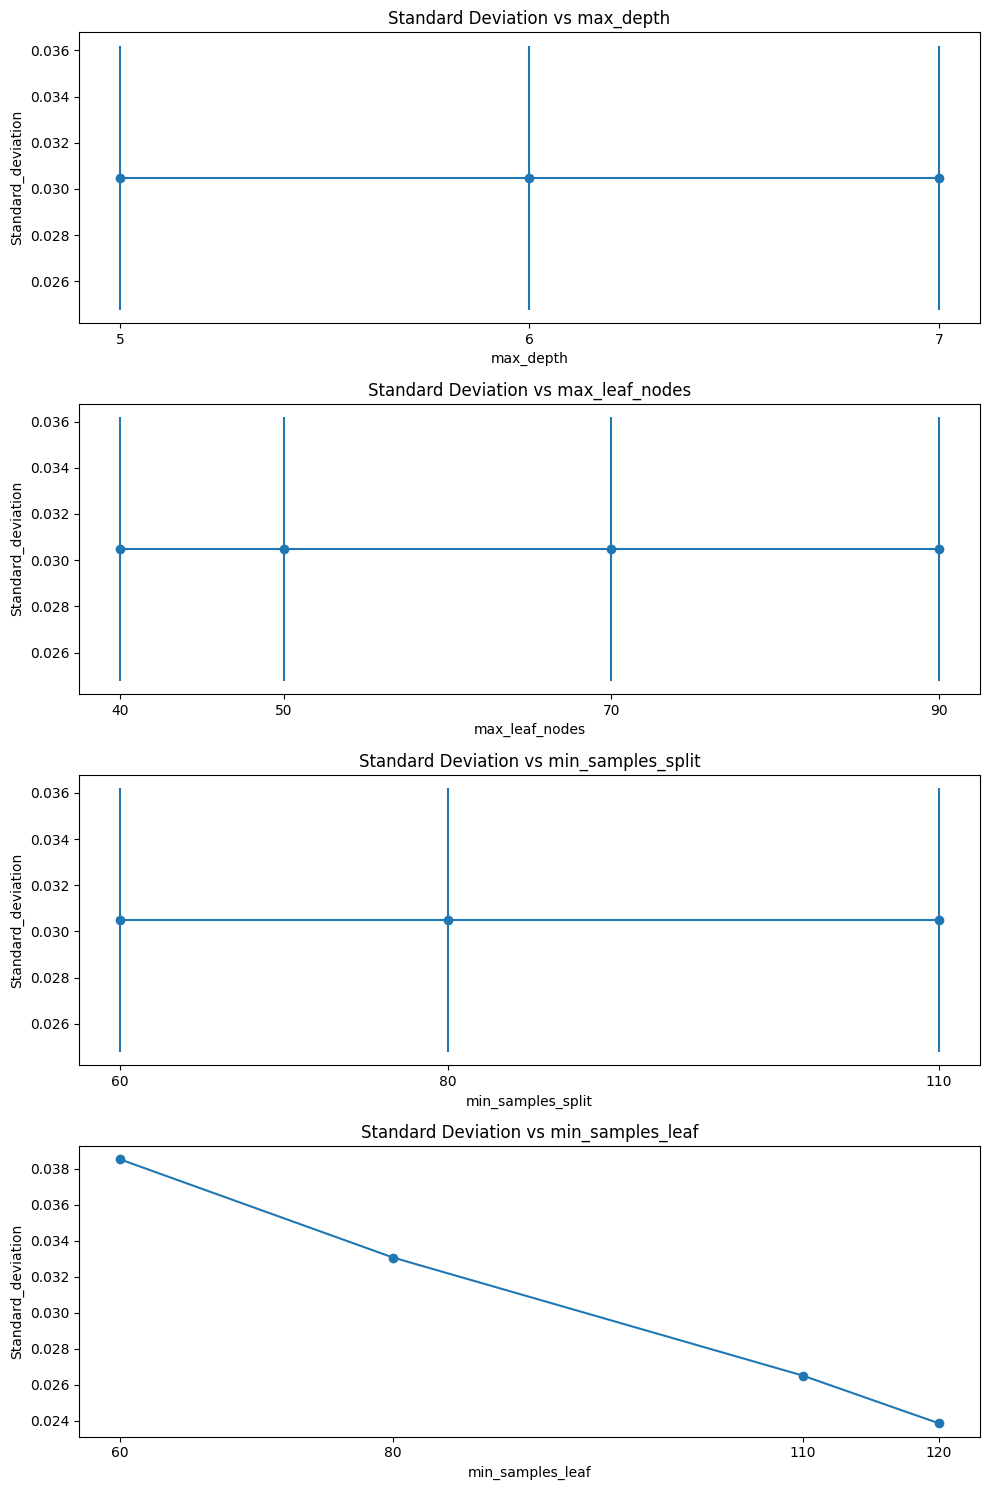

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant data from cv_results
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']
params = cv_results['params']



# Create separate plots for each hyperparameter
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, param_name in enumerate(param_grid.keys()):
    param_values = [params[j][param_name] for j in range(len(params))]
    
    # Convert None values to a placeholder that can be sorted
    param_values = [x if x is not None else -1 for x in param_values]
    
    param_values_unique = np.unique(param_values)
    mean_scores = np.zeros_like(param_values_unique, dtype=float)
    std_scores = np.zeros_like(param_values_unique, dtype=float)
    
    for j, value in enumerate(param_values_unique):
        # Replace placeholder with None for display purposes
        display_values = [value if value != -1 else 'None' for value in param_values_unique]
        scores = [std_test_scores[k] for k in range(len(std_test_scores )) if param_values[k] == value]
        mean_scores[j] = np.mean(scores)
        std_scores[j] = np.std(scores)
    
    axs[i].errorbar(param_values_unique, mean_scores, yerr=std_scores, fmt='-o')
    axs[i].set_xticks(param_values_unique)
    axs[i].set_xticklabels(display_values)  # set_xticklabels instead of set_xticklabels
    axs[i].set_xlabel(param_name)
    axs[i].set_ylabel('Standard_deviation')
    axs[i].set_title('Standard Deviation vs {}'.format(param_name))

plt.tight_layout()
plt.show()


In [51]:
y_pred = best_clf.predict(X_test_scaled)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on X_test:", accuracy)

Accuracy on X_test: 0.49612403100775193


In [20]:
# load model
model= joblib.load('tuned_dt_conc_70_gd.joblib')

y_pred = model.predict(X_test_scaled)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on X_test_hog:", accuracy)

Accuracy on X_test_hog: 0.49612403100775193


In [ ]:
# for plotting graphs for correct predictions

# folder='saved_models_dt'
# loaded_clf=joblib.load(f'{folder}/min_img/20/conc_20_d10_ms4.joblib')

# y_pred_loaded=loaded_clf.predict(X_test)  #be careful here which model's X_test is there

# indices=np.where(y_pred_loaded==y_test)[0]
# y_pred_correct=y_pred_loaded[indices]


# df_correct = pd.DataFrame({
#     'y_correct': y_pred_correct,
    
# })


# unique_classes_count = df_correct['y_correct'].value_counts()

# plt.figure(figsize=(10, 6))
# unique_classes_count.plot(kind='bar', color='skyblue')
# plt.xlabel('Unique Classes')
# plt.ylabel('Count')
# plt.title('Count of Unique Classes Predicted Correctly')
# plt.xticks(rotation=45)
# plt.grid(axis='y')

# plt.show()

In [52]:
X_hog_train=X_train.iloc[:,1:945]
X_hog_test=X_test.iloc[:,1:945]

X_train_hog_arr=X_hog_train.values


X_train_hog_scaled = scaler.fit_transform(X_train_hog_arr)

X_test_hog_arr=X_hog_test.values

X_test_hog_scaled = scaler.transform(X_test_hog_arr)

In [53]:
# Getting the max_depth
model(X_train_hog_scaled,None,'maxdepth')

Accuracy using feature of maxdepth: 0.33495145631067963
Depth of the decision tree: 14


In [54]:
# Got maximum depth of the tree as 20
for i in range(1,14,2):
    model(X_train_hog_scaled,i,f'max_depth_{i}','max_depth')

Accuracy using feature of max_depth_1: 0.45145631067961167
Depth of the decision tree: 1
Accuracy using feature of max_depth_3: 0.4174757281553398
Depth of the decision tree: 3
Accuracy using feature of max_depth_5: 0.42718446601941745
Depth of the decision tree: 5
Accuracy using feature of max_depth_7: 0.3640776699029126
Depth of the decision tree: 7
Accuracy using feature of max_depth_9: 0.3883495145631068
Depth of the decision tree: 9
Accuracy using feature of max_depth_11: 0.3786407766990291
Depth of the decision tree: 11
Accuracy using feature of max_depth_13: 0.33495145631067963
Depth of the decision tree: 13


In [66]:
for i in range(2,1030,50):
        model(X_train_hog_scaled,i,f'max_leaf_node {i}','max_leaf_nodes')

Accuracy using feature of max_leaf_node 2: 0.45145631067961167
Depth of the decision tree: 1
Accuracy using feature of max_leaf_node 52: 0.36893203883495146
Depth of the decision tree: 12
Accuracy using feature of max_leaf_node 102: 0.32038834951456313
Depth of the decision tree: 12
Accuracy using feature of max_leaf_node 152: 0.3155339805825243
Depth of the decision tree: 13
Accuracy using feature of max_leaf_node 202: 0.3155339805825243
Depth of the decision tree: 14
Accuracy using feature of max_leaf_node 252: 0.3155339805825243
Depth of the decision tree: 14
Accuracy using feature of max_leaf_node 302: 0.3155339805825243
Depth of the decision tree: 14
Accuracy using feature of max_leaf_node 352: 0.3155339805825243
Depth of the decision tree: 14
Accuracy using feature of max_leaf_node 402: 0.3155339805825243
Depth of the decision tree: 14
Accuracy using feature of max_leaf_node 452: 0.3155339805825243
Depth of the decision tree: 14
Accuracy using feature of max_leaf_node 502: 0.3155

In [67]:
# for min_sample_split
for i in range(2,1030,50):
    model(X_train_hog_scaled,i,f'min_samples_split {i}','min_samples_split')

Accuracy using feature of min_samples_split 2: 0.33495145631067963
Depth of the decision tree: 14
Accuracy using feature of min_samples_split 52: 0.4077669902912621
Depth of the decision tree: 10
Accuracy using feature of min_samples_split 102: 0.4029126213592233
Depth of the decision tree: 7
Accuracy using feature of min_samples_split 152: 0.4320388349514563
Depth of the decision tree: 6
Accuracy using feature of min_samples_split 202: 0.4320388349514563
Depth of the decision tree: 5
Accuracy using feature of min_samples_split 252: 0.44660194174757284
Depth of the decision tree: 4
Accuracy using feature of min_samples_split 302: 0.4029126213592233
Depth of the decision tree: 3
Accuracy using feature of min_samples_split 352: 0.4029126213592233
Depth of the decision tree: 3
Accuracy using feature of min_samples_split 402: 0.45145631067961167
Depth of the decision tree: 2
Accuracy using feature of min_samples_split 452: 0.45145631067961167
Depth of the decision tree: 2
Accuracy using fe

In [68]:
# min_samples_leaf
for i in range(1,1030,50):
    model(X_train_hog_scaled,i,f'min_samples_leaf{i}','min_samples_leaf')

Accuracy using feature of min_samples_leaf1: 0.33495145631067963
Depth of the decision tree: 14
Accuracy using feature of min_samples_leaf51: 0.39805825242718446
Depth of the decision tree: 6
Accuracy using feature of min_samples_leaf101: 0.44660194174757284
Depth of the decision tree: 4
Accuracy using feature of min_samples_leaf151: 0.45145631067961167
Depth of the decision tree: 3
Accuracy using feature of min_samples_leaf201: 0.45145631067961167
Depth of the decision tree: 2
Accuracy using feature of min_samples_leaf251: 0.45145631067961167
Depth of the decision tree: 2
Accuracy using feature of min_samples_leaf301: 0.4223300970873786
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf351: 0.441747572815534
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf401: 0.46601941747572817
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf451: 0.46601941747572817
Depth of the decision tree: 0
Accuracy using feature of min_sampl

In [72]:
# on analysing the best range I found the following param grid:
param_grid_hog={
    'max_depth': [2,4,6],
    'max_leaf_nodes':[20,30,50,60],
    'min_samples_split': [450,480,520],
    'min_samples_leaf': [80,100,120,150]
}



In [73]:
cv_results_hog,best_clf_hog=tuning_model(X_train_hog_scaled,'hog_70_gd',param_grid_hog)

Grid Search Results: 
1). Rank_score: 73, Mean accuracy: 0.435, Parameters: {'max_depth': 2, 'max_leaf_nodes': 20, 'min_samples_leaf': 80, 'min_samples_split': 450}
2). Rank_score: 73, Mean accuracy: 0.435, Parameters: {'max_depth': 2, 'max_leaf_nodes': 20, 'min_samples_leaf': 80, 'min_samples_split': 480}
3). Rank_score: 73, Mean accuracy: 0.435, Parameters: {'max_depth': 2, 'max_leaf_nodes': 20, 'min_samples_leaf': 80, 'min_samples_split': 520}
4). Rank_score: 73, Mean accuracy: 0.435, Parameters: {'max_depth': 2, 'max_leaf_nodes': 20, 'min_samples_leaf': 100, 'min_samples_split': 450}
5). Rank_score: 73, Mean accuracy: 0.435, Parameters: {'max_depth': 2, 'max_leaf_nodes': 20, 'min_samples_leaf': 100, 'min_samples_split': 480}
6). Rank_score: 73, Mean accuracy: 0.435, Parameters: {'max_depth': 2, 'max_leaf_nodes': 20, 'min_samples_leaf': 100, 'min_samples_split': 520}
7). Rank_score: 1, Mean accuracy: 0.442, Parameters: {'max_depth': 2, 'max_leaf_nodes': 20, 'min_samples_leaf': 120, 

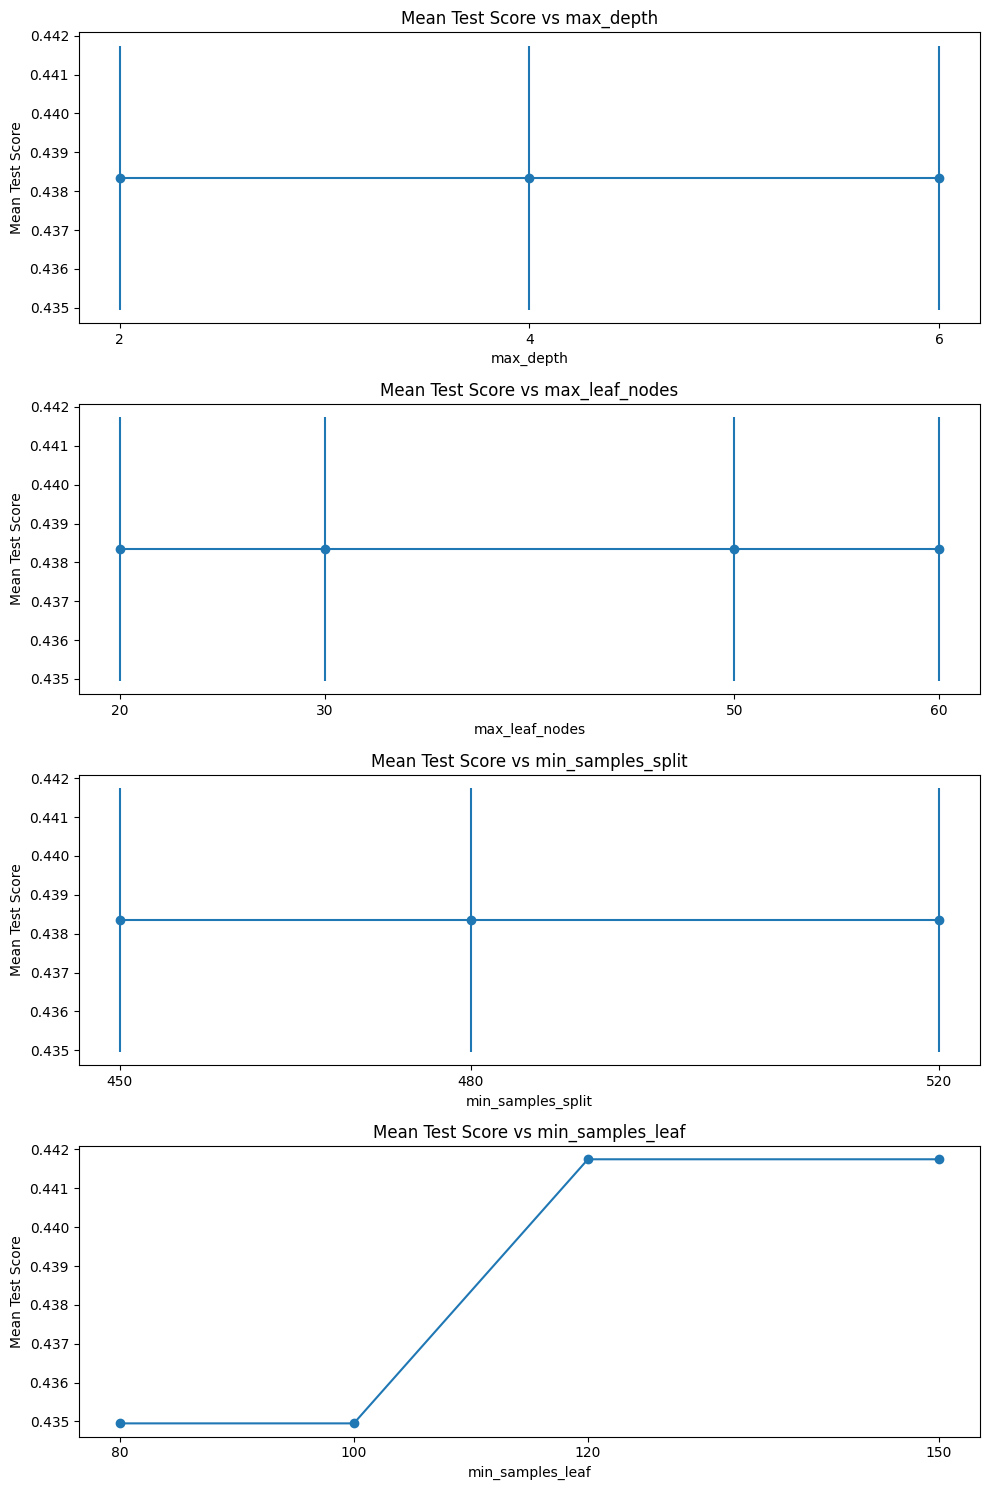

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant data from cv_results
mean_test_scores = cv_results_hog['mean_test_score']
std_test_scores = cv_results_hog['std_test_score']
params = cv_results_hog['params']

# Create separate plots for each hyperparameter
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, param_name in enumerate(param_grid.keys()):
    param_values = [params[j][param_name] for j in range(len(params))]
    
    # Convert None values to a placeholder that can be sorted
    param_values = [x if x is not None else -1 for x in param_values]
    
    param_values_unique = np.unique(param_values)
    mean_scores = np.zeros_like(param_values_unique, dtype=float)
    std_scores = np.zeros_like(param_values_unique, dtype=float)
    
    for j, value in enumerate(param_values_unique):
        # Replace placeholder with None for display purposes
        display_values = [value if value != -1 else 'None' for value in param_values_unique]
        scores = [mean_test_scores[k] for k in range(len(mean_test_scores)) if param_values[k] == value]
        mean_scores[j] = np.mean(scores)
        std_scores[j] = np.std(scores)
    
    axs[i].errorbar(param_values_unique, mean_scores, yerr=std_scores, fmt='-o')
    axs[i].set_xticks(param_values_unique)
    axs[i].set_xticklabels(display_values)  # set_xticklabels instead of set_xticklabels
    axs[i].set_xlabel(param_name)
    axs[i].set_ylabel('Mean Test Score')
    axs[i].set_title('Mean Test Score vs {}'.format(param_name))

plt.tight_layout()
plt.show()


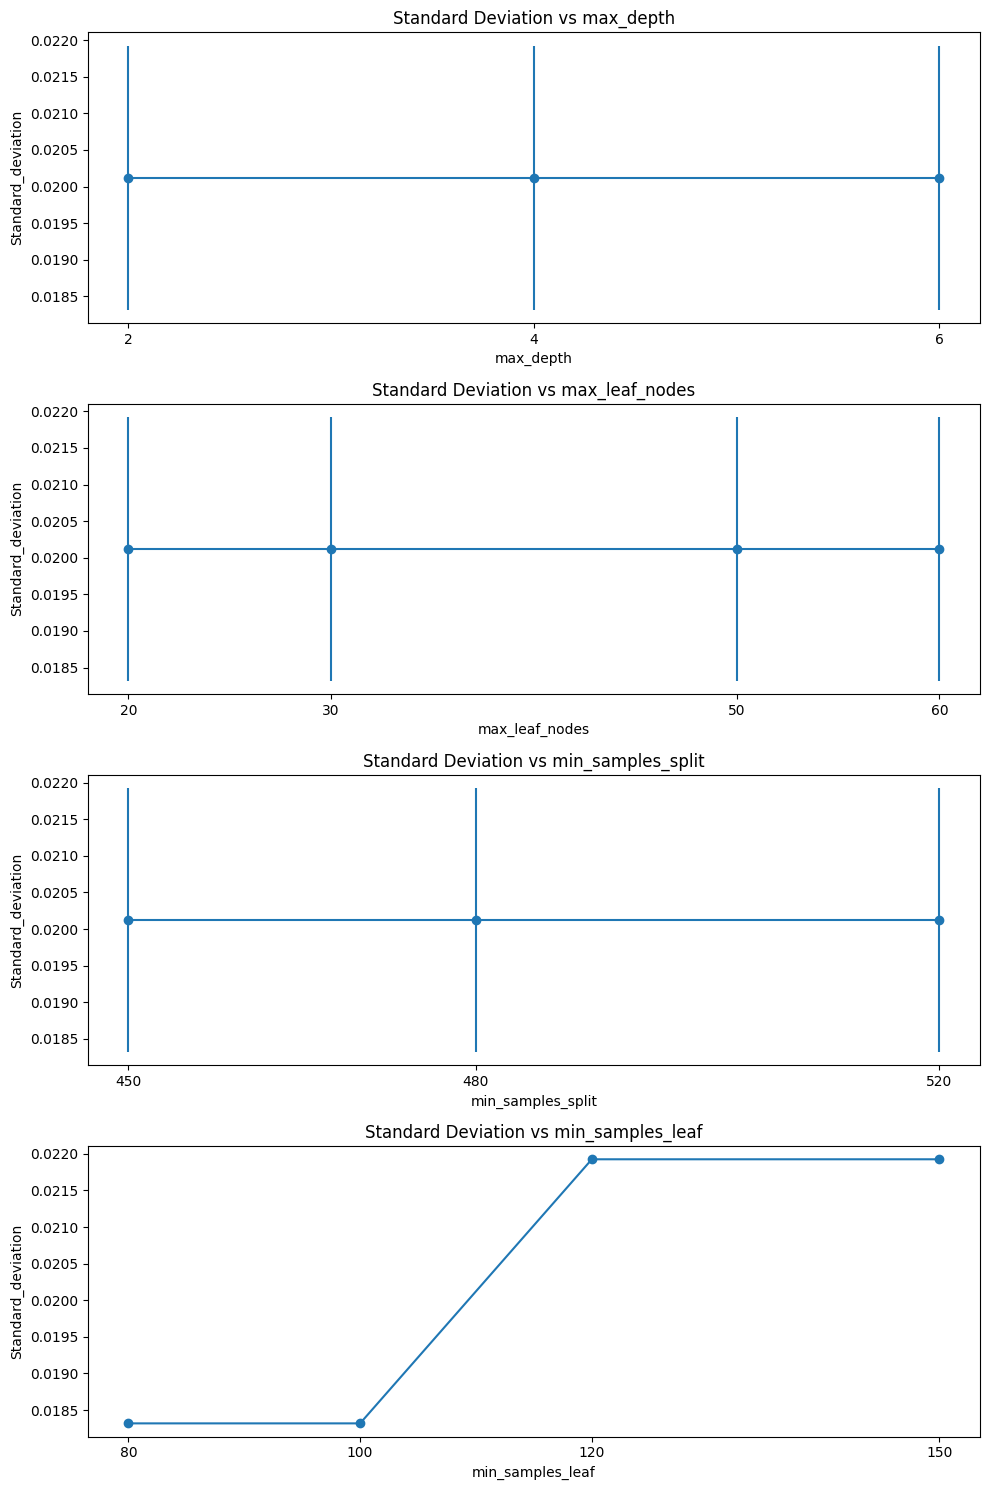

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant data from cv_results

std_test_scores = cv_results_hog['std_test_score']
params = cv_results_hog['params']



# Create separate plots for each hyperparameter
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, param_name in enumerate(param_grid.keys()):
    param_values = [params[j][param_name] for j in range(len(params))]
    
    # Convert None values to a placeholder that can be sorted
    param_values = [x if x is not None else -1 for x in param_values]
    
    param_values_unique = np.unique(param_values)
    mean_scores = np.zeros_like(param_values_unique, dtype=float)
    std_scores = np.zeros_like(param_values_unique, dtype=float)
    
    for j, value in enumerate(param_values_unique):
        # Replace placeholder with None for display purposes
        display_values = [value if value != -1 else 'None' for value in param_values_unique]
        scores = [std_test_scores[k] for k in range(len(std_test_scores )) if param_values[k] == value]
        mean_scores[j] = np.mean(scores)
        std_scores[j] = np.std(scores)
    
    axs[i].errorbar(param_values_unique, mean_scores, yerr=std_scores, fmt='-o')
    axs[i].set_xticks(param_values_unique)
    axs[i].set_xticklabels(display_values)  # set_xticklabels instead of set_xticklabels
    axs[i].set_xlabel(param_name)
    axs[i].set_ylabel('Standard_deviation')
    axs[i].set_title('Standard Deviation vs {}'.format(param_name))

plt.tight_layout()
plt.show()


In [76]:
# Testing on the test data:

y_pred_hog = best_clf_hog.predict(X_test_hog_scaled)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_hog)

print(f"Accuracy on X_test_hog:", accuracy)

Accuracy on X_test_hog: 0.43023255813953487


In [14]:
X_cnn_train=X_train.iloc[:,945:2993]
X_train_cnn_arr=X_cnn_train.values
X_train_cnn_scaled = scaler.fit_transform(X_train_cnn_arr)


X_cnn_test=X_test.iloc[:,945:2993]
X_test_cnn_arr=X_cnn_test.values
X_test_cnn_scaled = scaler.transform(X_test_cnn_arr)



In [78]:
# finding the max_depth
model(X_train_cnn_scaled,None,'maxdepth')

Accuracy using feature of maxdepth: 0.5145631067961165
Depth of the decision tree: 21


In [79]:
# Got maximum depth for cnn of the tree as 18
for i in range(1,22,2):
    model(X_train_cnn_scaled,i,f'max_depth_{i}','max_depth')

Accuracy using feature of max_depth_1: 0.529126213592233
Depth of the decision tree: 1
Accuracy using feature of max_depth_3: 0.49029126213592233
Depth of the decision tree: 3
Accuracy using feature of max_depth_5: 0.5533980582524272
Depth of the decision tree: 5
Accuracy using feature of max_depth_7: 0.5048543689320388
Depth of the decision tree: 7
Accuracy using feature of max_depth_9: 0.5339805825242718
Depth of the decision tree: 9
Accuracy using feature of max_depth_11: 0.5339805825242718
Depth of the decision tree: 11
Accuracy using feature of max_depth_13: 0.5388349514563107
Depth of the decision tree: 13
Accuracy using feature of max_depth_15: 0.5194174757281553
Depth of the decision tree: 15
Accuracy using feature of max_depth_17: 0.5242718446601942
Depth of the decision tree: 17
Accuracy using feature of max_depth_19: 0.5048543689320388
Depth of the decision tree: 19
Accuracy using feature of max_depth_21: 0.5145631067961165
Depth of the decision tree: 21


In [80]:
for i in range(2,1030,50):
        model(X_train_scaled,i,f'max_leaf_node {i}','max_leaf_nodes')

Accuracy using feature of max_leaf_node 2: 0.529126213592233
Depth of the decision tree: 1
Accuracy using feature of max_leaf_node 52: 0.558252427184466
Depth of the decision tree: 10
Accuracy using feature of max_leaf_node 102: 0.5194174757281553
Depth of the decision tree: 17
Accuracy using feature of max_leaf_node 152: 0.5194174757281553
Depth of the decision tree: 17
Accuracy using feature of max_leaf_node 202: 0.5145631067961165
Depth of the decision tree: 17
Accuracy using feature of max_leaf_node 252: 0.5145631067961165
Depth of the decision tree: 17
Accuracy using feature of max_leaf_node 302: 0.5145631067961165
Depth of the decision tree: 17
Accuracy using feature of max_leaf_node 352: 0.5145631067961165
Depth of the decision tree: 17
Accuracy using feature of max_leaf_node 402: 0.5145631067961165
Depth of the decision tree: 17
Accuracy using feature of max_leaf_node 452: 0.5145631067961165
Depth of the decision tree: 17
Accuracy using feature of max_leaf_node 502: 0.514563106

In [81]:
# for min_sample_split
for i in range(2,1030,50):
    model(X_train_cnn_scaled,i,f'min_samples_split {i}','min_samples_split')

Accuracy using feature of min_samples_split 2: 0.5145631067961165
Depth of the decision tree: 21
Accuracy using feature of min_samples_split 52: 0.5048543689320388
Depth of the decision tree: 20
Accuracy using feature of min_samples_split 102: 0.5145631067961165
Depth of the decision tree: 20
Accuracy using feature of min_samples_split 152: 0.5242718446601942
Depth of the decision tree: 20
Accuracy using feature of min_samples_split 202: 0.5145631067961165
Depth of the decision tree: 16
Accuracy using feature of min_samples_split 252: 0.5485436893203883
Depth of the decision tree: 4
Accuracy using feature of min_samples_split 302: 0.49514563106796117
Depth of the decision tree: 3
Accuracy using feature of min_samples_split 352: 0.4854368932038835
Depth of the decision tree: 2
Accuracy using feature of min_samples_split 402: 0.4854368932038835
Depth of the decision tree: 2
Accuracy using feature of min_samples_split 452: 0.529126213592233
Depth of the decision tree: 1
Accuracy using fea

In [82]:
# min_samples_leaf
for i in range(1,1030,50):
    model(X_train_cnn_scaled,i,f'min_samples_leaf{i}','min_samples_leaf')

Accuracy using feature of min_samples_leaf1: 0.5145631067961165
Depth of the decision tree: 21
Accuracy using feature of min_samples_leaf51: 0.5922330097087378
Depth of the decision tree: 5
Accuracy using feature of min_samples_leaf101: 0.558252427184466
Depth of the decision tree: 3
Accuracy using feature of min_samples_leaf151: 0.5097087378640777
Depth of the decision tree: 2
Accuracy using feature of min_samples_leaf201: 0.5194174757281553
Depth of the decision tree: 2
Accuracy using feature of min_samples_leaf251: 0.529126213592233
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf301: 0.529126213592233
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf351: 0.529126213592233
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf401: 0.5339805825242718
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf451: 0.46601941747572817
Depth of the decision tree: 0
Accuracy using feature of min_samples_leaf501

In [83]:
param_grid_cnn={
    'max_depth': [2,4,5,6],
    'max_leaf_nodes':[2,10,30,50],
    'min_samples_split': [150,170,200,220,250],
    'min_samples_leaf': [2,10,20,40,60,90]
}

In [84]:
cv_results_cnn,best_clf_cnn=tuning_model(X_train_cnn_scaled,'cnn_70_gd',param_grid_cnn)

Grid Search Results: 
1). Rank_score: 361, Mean accuracy: 0.450, Parameters: {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 150}
2). Rank_score: 361, Mean accuracy: 0.450, Parameters: {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 170}
3). Rank_score: 361, Mean accuracy: 0.450, Parameters: {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 200}
4). Rank_score: 361, Mean accuracy: 0.450, Parameters: {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 220}
5). Rank_score: 361, Mean accuracy: 0.450, Parameters: {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 250}
6). Rank_score: 361, Mean accuracy: 0.450, Parameters: {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 10, 'min_samples_split': 150}
7). Rank_score: 361, Mean accuracy: 0.450, Parameters: {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 10, 'min_sam

In [85]:
y_pred_cnn = best_clf_cnn.predict(X_test_cnn_scaled)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_cnn)

print(f"Accuracy on X_test:", accuracy)

Accuracy on X_test: 0.5077519379844961


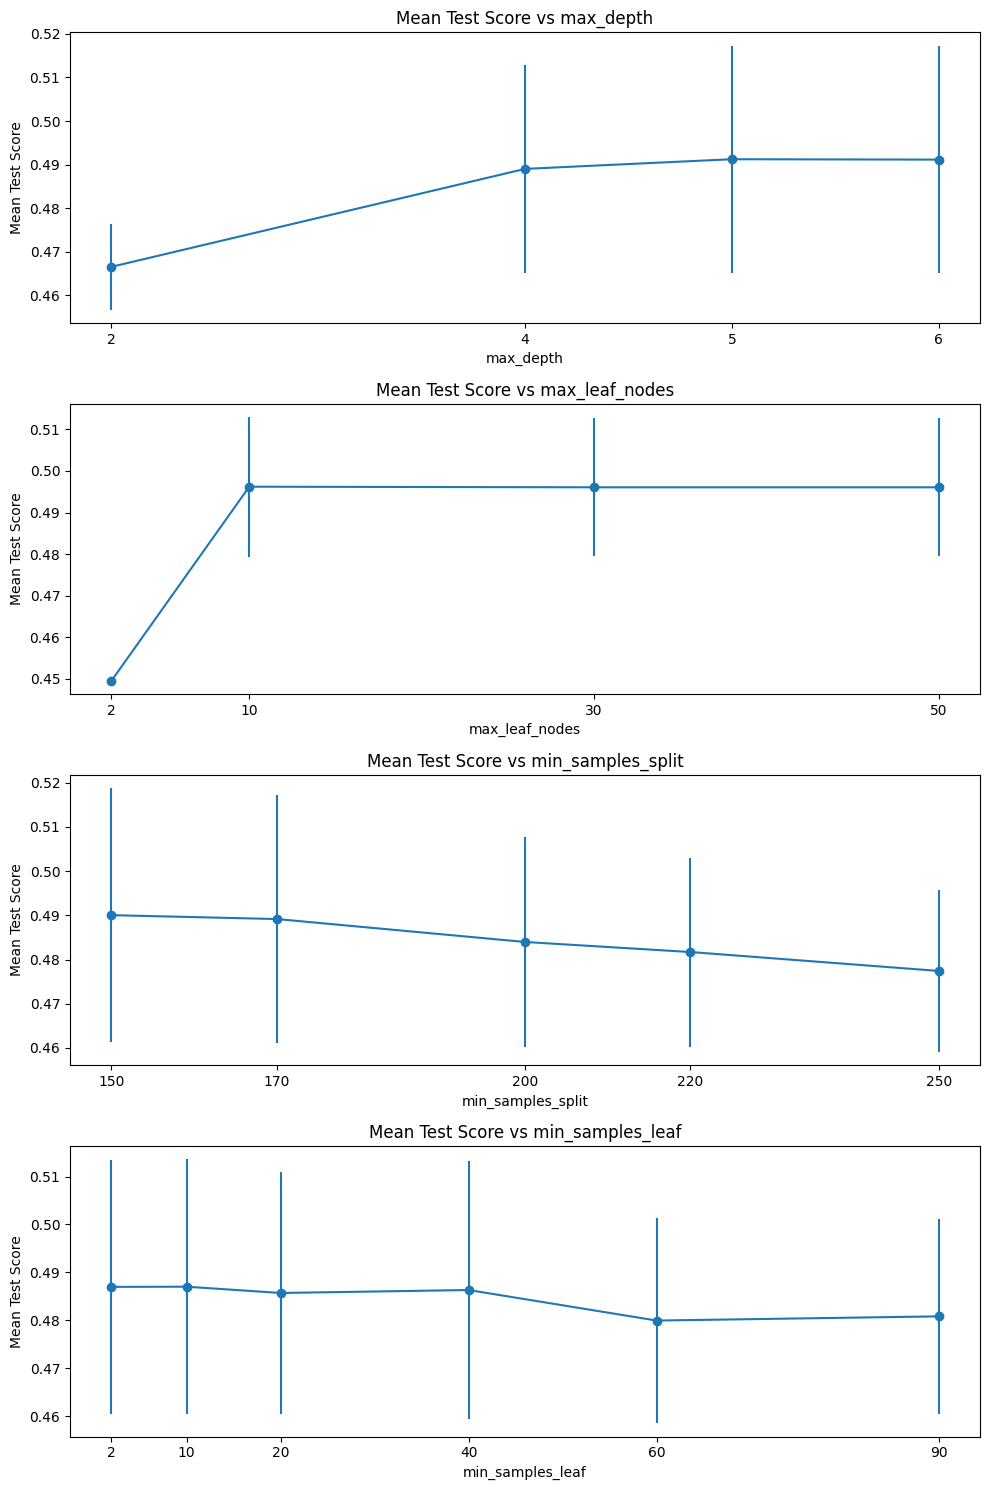

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant data from cv_results
mean_test_scores = cv_results_cnn['mean_test_score']
params = cv_results_cnn['params']

# Create separate plots for each hyperparameter
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, param_name in enumerate(param_grid.keys()):
    param_values = [params[j][param_name] for j in range(len(params))]
    
    # Convert None values to a placeholder that can be sorted
    param_values = [x if x is not None else -1 for x in param_values]
    
    param_values_unique = np.unique(param_values)
    mean_scores = np.zeros_like(param_values_unique, dtype=float)
    std_scores = np.zeros_like(param_values_unique, dtype=float)
    
    for j, value in enumerate(param_values_unique):
        # Replace placeholder with None for display purposes
        display_values = [value if value != -1 else 'None' for value in param_values_unique]
        scores = [mean_test_scores[k] for k in range(len(mean_test_scores)) if param_values[k] == value]
        mean_scores[j] = np.mean(scores)
        std_scores[j] = np.std(scores)
    
    axs[i].errorbar(param_values_unique, mean_scores, yerr=std_scores, fmt='-o')
    axs[i].set_xticks(param_values_unique)
    axs[i].set_xticklabels(display_values)  # set_xticklabels instead of set_xticklabels
    axs[i].set_xlabel(param_name)
    axs[i].set_ylabel('Mean Test Score')
    axs[i].set_title('Mean Test Score vs {}'.format(param_name))

plt.tight_layout()
plt.show()


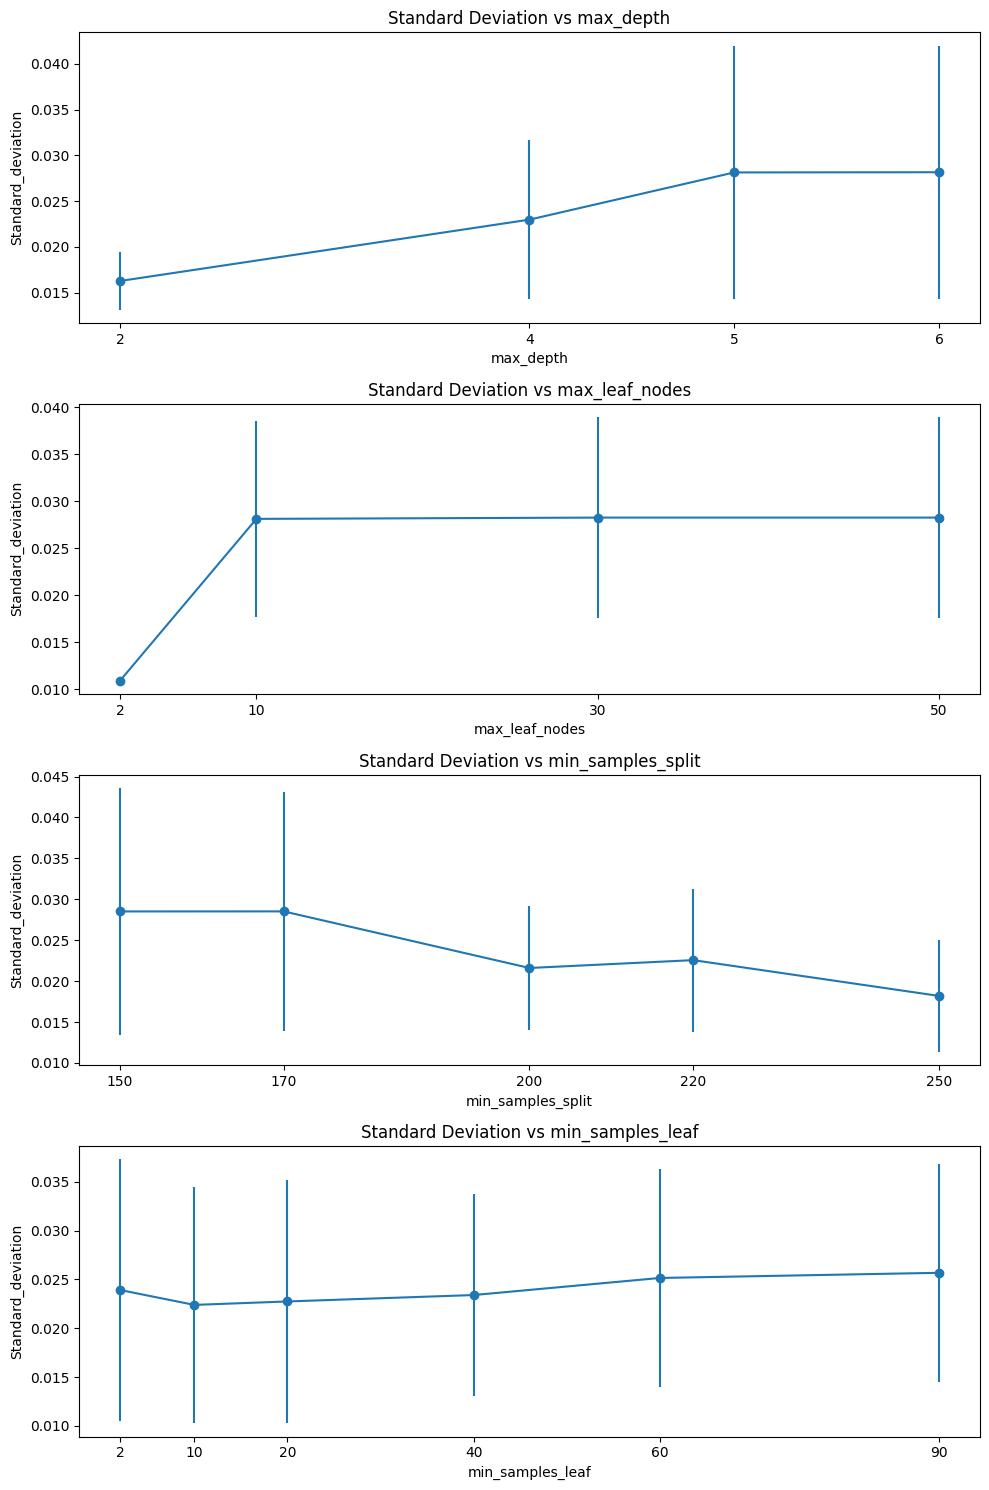

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant data from cv_results

std_test_scores = cv_results_cnn['std_test_score']
params = cv_results_cnn['params']



# Create separate plots for each hyperparameter
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, param_name in enumerate(param_grid.keys()):
    param_values = [params[j][param_name] for j in range(len(params))]
    
    # Convert None values to a placeholder that can be sorted
    param_values = [x if x is not None else -1 for x in param_values]
    
    param_values_unique = np.unique(param_values)
    mean_scores = np.zeros_like(param_values_unique, dtype=float)
    std_scores = np.zeros_like(param_values_unique, dtype=float)
    
    for j, value in enumerate(param_values_unique):
        # Replace placeholder with None for display purposes
        display_values = [value if value != -1 else 'None' for value in param_values_unique]
        scores = [std_test_scores[k] for k in range(len(std_test_scores )) if param_values[k] == value]
        mean_scores[j] = np.mean(scores)
        std_scores[j] = np.std(scores)
    
    axs[i].errorbar(param_values_unique, mean_scores, yerr=std_scores, fmt='-o')
    axs[i].set_xticks(param_values_unique)
    axs[i].set_xticklabels(display_values)  # set_xticklabels instead of set_xticklabels
    axs[i].set_xlabel(param_name)
    axs[i].set_ylabel('Standard_deviation')
    axs[i].set_title('Standard Deviation vs {}'.format(param_name))

plt.tight_layout()
plt.show()


In [16]:
# load model
model_cnn = joblib.load('tuned_dt_cnn_70_gd.joblib')

y_pred_cnn = model_cnn.predict(X_test_cnn_scaled)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_cnn)

print(f"Accuracy on X_test_hog:", accuracy)

Accuracy on X_test_hog: 0.5077519379844961


<h2>For LBP

In [11]:
X_lbp_train=X_train.iloc[:,2993:3249]
X_train_lbp_arr=X_lbp_train.values
X_train_lbp_scaled = scaler.fit_transform(X_train_lbp_arr)

print(X_train_lbp_scaled.shape)

X_lbp_test=X_test.iloc[:,2993:3249]
X_test_lbp_arr=X_lbp_test.values
X_test_lbp_scaled = scaler.transform(X_test_lbp_arr)

(1030, 255)


In [89]:
#getting the max_depth
model(X_train_lbp_scaled,None,'maxdepth')


Accuracy using feature of maxdepth: 0.3786407766990291
Depth of the decision tree: 20


In [90]:
# Got maximum depth for cnn of the tree as 18
for i in range(1,20,2):
    model(X_train_lbp_scaled,i,f'max_depth_{i}','max_depth')

Accuracy using feature of max_depth_1: 0.46601941747572817
Depth of the decision tree: 1
Accuracy using feature of max_depth_3: 0.441747572815534
Depth of the decision tree: 3
Accuracy using feature of max_depth_5: 0.46601941747572817
Depth of the decision tree: 5
Accuracy using feature of max_depth_7: 0.46601941747572817
Depth of the decision tree: 7
Accuracy using feature of max_depth_9: 0.42718446601941745
Depth of the decision tree: 9
Accuracy using feature of max_depth_11: 0.4029126213592233
Depth of the decision tree: 11
Accuracy using feature of max_depth_13: 0.3932038834951456
Depth of the decision tree: 13
Accuracy using feature of max_depth_15: 0.39805825242718446
Depth of the decision tree: 15
Accuracy using feature of max_depth_17: 0.3640776699029126
Depth of the decision tree: 17
Accuracy using feature of max_depth_19: 0.36893203883495146
Depth of the decision tree: 19


In [91]:
for i in range(2,1030,50):
        model(X_train_lbp_scaled,i,f'max_leaf_node {i}','max_leaf_nodes')

Accuracy using feature of max_leaf_node 2: 0.46601941747572817
Depth of the decision tree: 1
Accuracy using feature of max_leaf_node 52: 0.4563106796116505
Depth of the decision tree: 11
Accuracy using feature of max_leaf_node 102: 0.4174757281553398
Depth of the decision tree: 16
Accuracy using feature of max_leaf_node 152: 0.3786407766990291
Depth of the decision tree: 19
Accuracy using feature of max_leaf_node 202: 0.3883495145631068
Depth of the decision tree: 20
Accuracy using feature of max_leaf_node 252: 0.3786407766990291
Depth of the decision tree: 20
Accuracy using feature of max_leaf_node 302: 0.3786407766990291
Depth of the decision tree: 20
Accuracy using feature of max_leaf_node 352: 0.3786407766990291
Depth of the decision tree: 20
Accuracy using feature of max_leaf_node 402: 0.3786407766990291
Depth of the decision tree: 20
Accuracy using feature of max_leaf_node 452: 0.3786407766990291
Depth of the decision tree: 20
Accuracy using feature of max_leaf_node 502: 0.378640

In [92]:
# for min_sample_split
for i in range(2,1030,50):
    model(X_train_lbp_scaled,i,f'min_samples_split {i}','min_samples_split')

Accuracy using feature of min_samples_split 2: 0.3786407766990291
Depth of the decision tree: 20
Accuracy using feature of min_samples_split 52: 0.441747572815534
Depth of the decision tree: 18
Accuracy using feature of min_samples_split 102: 0.46601941747572817
Depth of the decision tree: 11
Accuracy using feature of min_samples_split 152: 0.45145631067961167
Depth of the decision tree: 5
Accuracy using feature of min_samples_split 202: 0.45145631067961167
Depth of the decision tree: 4
Accuracy using feature of min_samples_split 252: 0.441747572815534
Depth of the decision tree: 4
Accuracy using feature of min_samples_split 302: 0.441747572815534
Depth of the decision tree: 3
Accuracy using feature of min_samples_split 352: 0.441747572815534
Depth of the decision tree: 3
Accuracy using feature of min_samples_split 402: 0.46601941747572817
Depth of the decision tree: 2
Accuracy using feature of min_samples_split 452: 0.46601941747572817
Depth of the decision tree: 2
Accuracy using feat

In [93]:
# min_samples_leaf
for i in range(1,1030,50):
    model(X_train_lbp_scaled,i,f'min_samples_leaf{i}','min_samples_leaf')

Accuracy using feature of min_samples_leaf1: 0.3786407766990291
Depth of the decision tree: 20
Accuracy using feature of min_samples_leaf51: 0.46116504854368934
Depth of the decision tree: 5
Accuracy using feature of min_samples_leaf101: 0.45145631067961167
Depth of the decision tree: 4
Accuracy using feature of min_samples_leaf151: 0.46601941747572817
Depth of the decision tree: 3
Accuracy using feature of min_samples_leaf201: 0.46601941747572817
Depth of the decision tree: 2
Accuracy using feature of min_samples_leaf251: 0.46601941747572817
Depth of the decision tree: 2
Accuracy using feature of min_samples_leaf301: 0.45145631067961167
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf351: 0.46601941747572817
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf401: 0.46601941747572817
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf451: 0.46601941747572817
Depth of the decision tree: 0
Accuracy using feature of min_sam

In [94]:
param_grid_lbp={
    'max_depth': [3,5,7],
    'max_leaf_nodes':[30,40,50,70],
    'min_samples_split': [400,470,520,550],
    'min_samples_leaf': [90,120,140,170,190]
}

In [95]:
cv_results_lbp,best_clf_lbp=tuning_model(X_train_lbp_scaled,'lbp_70_gd',param_grid_cnn)

Grid Search Results: 
1). Rank_score: 295, Mean accuracy: 0.416, Parameters: {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 150}
2). Rank_score: 295, Mean accuracy: 0.416, Parameters: {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 170}
3). Rank_score: 295, Mean accuracy: 0.416, Parameters: {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 200}
4). Rank_score: 295, Mean accuracy: 0.416, Parameters: {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 220}
5). Rank_score: 295, Mean accuracy: 0.416, Parameters: {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 250}
6). Rank_score: 295, Mean accuracy: 0.416, Parameters: {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 10, 'min_samples_split': 150}
7). Rank_score: 295, Mean accuracy: 0.416, Parameters: {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 10, 'min_sam

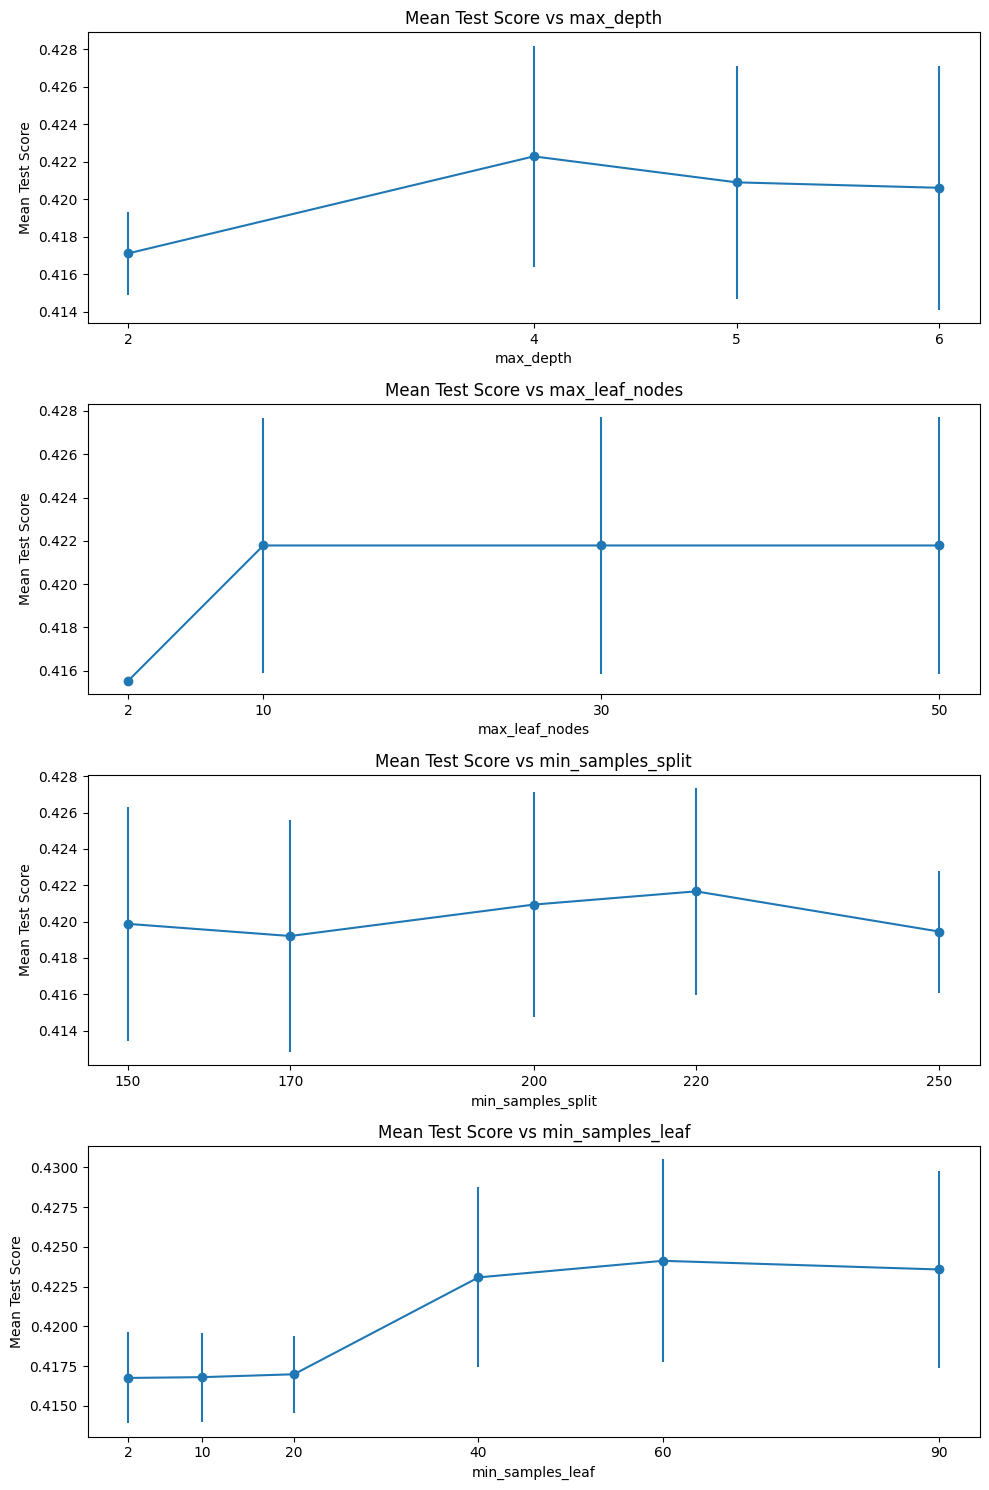

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant data from cv_results
mean_test_scores = cv_results_lbp['mean_test_score']
params = cv_results_lbp['params']

# Create separate plots for each hyperparameter
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, param_name in enumerate(param_grid.keys()):
    param_values = [params[j][param_name] for j in range(len(params))]
    
    # Convert None values to a placeholder that can be sorted
    param_values = [x if x is not None else -1 for x in param_values]
    
    param_values_unique = np.unique(param_values)
    mean_scores = np.zeros_like(param_values_unique, dtype=float)
    std_scores = np.zeros_like(param_values_unique, dtype=float)
    
    for j, value in enumerate(param_values_unique):
        # Replace placeholder with None for display purposes
        display_values = [value if value != -1 else 'None' for value in param_values_unique]
        scores = [mean_test_scores[k] for k in range(len(mean_test_scores)) if param_values[k] == value]
        mean_scores[j] = np.mean(scores)
        std_scores[j] = np.std(scores)
    
    axs[i].errorbar(param_values_unique, mean_scores, yerr=std_scores, fmt='-o')
    axs[i].set_xticks(param_values_unique)
    axs[i].set_xticklabels(display_values)  # set_xticklabels instead of set_xticklabels
    axs[i].set_xlabel(param_name)
    axs[i].set_ylabel('Mean Test Score')
    axs[i].set_title('Mean Test Score vs {}'.format(param_name))

plt.tight_layout()
plt.show()


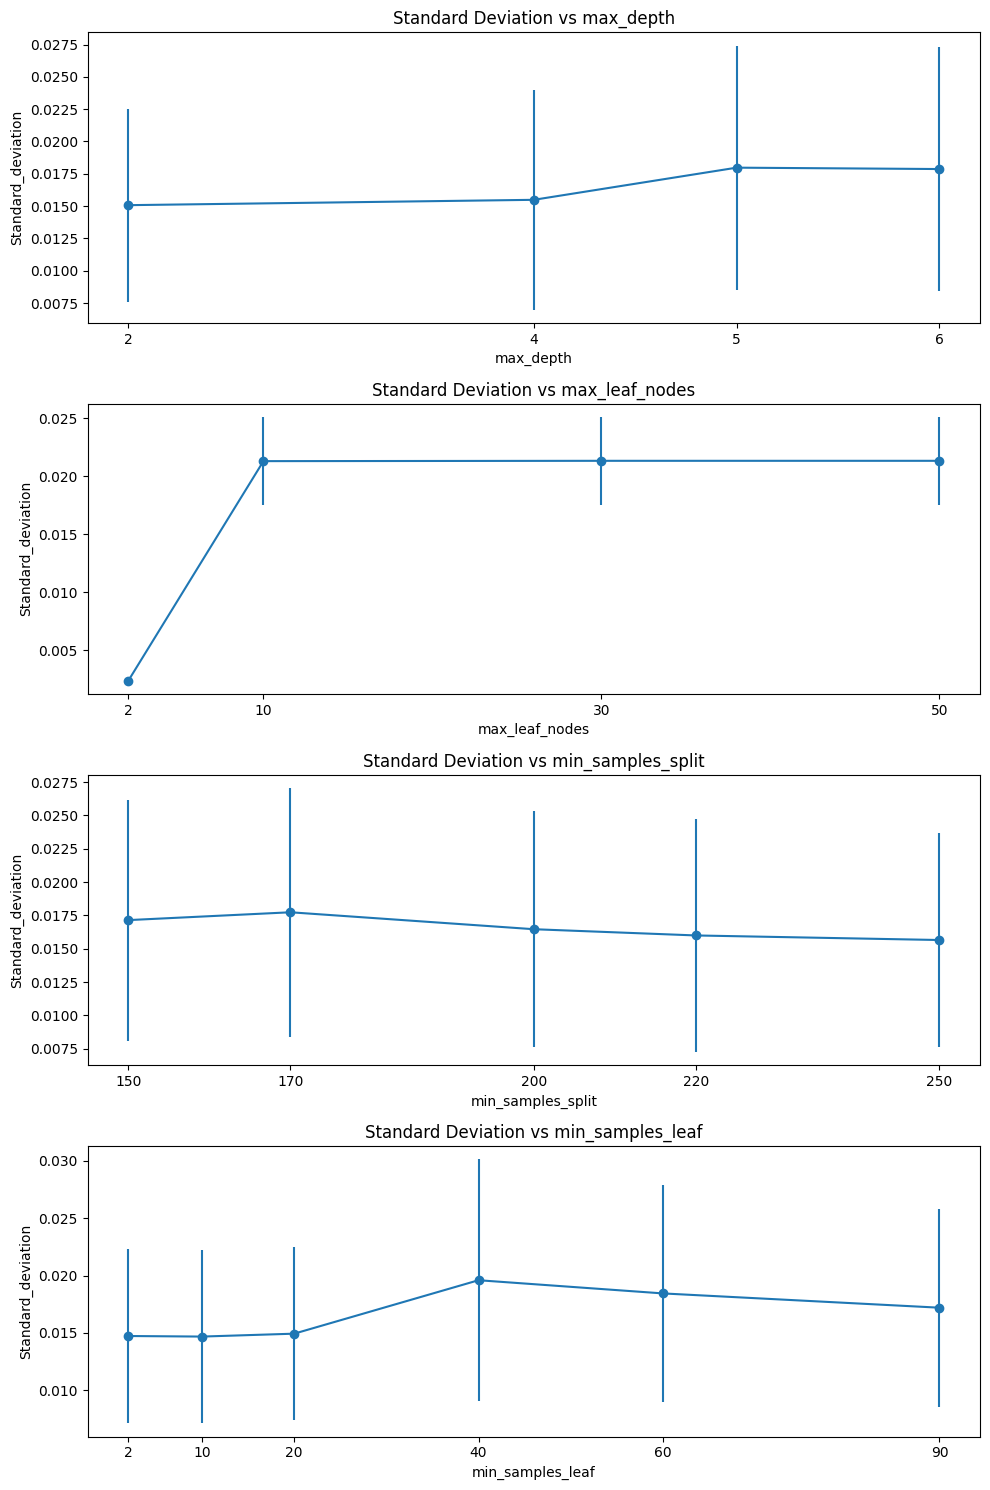

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant data from cv_results

std_test_scores = cv_results_lbp['std_test_score']
params = cv_results_lbp['params']



# Create separate plots for each hyperparameter
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, param_name in enumerate(param_grid.keys()):
    param_values = [params[j][param_name] for j in range(len(params))]
    
    # Convert None values to a placeholder that can be sorted
    param_values = [x if x is not None else -1 for x in param_values]
    
    param_values_unique = np.unique(param_values)
    mean_scores = np.zeros_like(param_values_unique, dtype=float)
    std_scores = np.zeros_like(param_values_unique, dtype=float)
    
    for j, value in enumerate(param_values_unique):
        # Replace placeholder with None for display purposes
        display_values = [value if value != -1 else 'None' for value in param_values_unique]
        scores = [std_test_scores[k] for k in range(len(std_test_scores )) if param_values[k] == value]
        mean_scores[j] = np.mean(scores)
        std_scores[j] = np.std(scores)
    
    axs[i].errorbar(param_values_unique, mean_scores, yerr=std_scores, fmt='-o')
    axs[i].set_xticks(param_values_unique)
    axs[i].set_xticklabels(display_values)  # set_xticklabels instead of set_xticklabels
    axs[i].set_xlabel(param_name)
    axs[i].set_ylabel('Standard_deviation')
    axs[i].set_title('Standard Deviation vs {}'.format(param_name))

plt.tight_layout()
plt.show()


In [98]:
# Testing on the test data:

y_pred_lbp = best_clf_lbp.predict(X_test_lbp_scaled)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_lbp)

print(f"Accuracy on X_test_hog:", accuracy)

Accuracy on X_test_hog: 0.40310077519379844


In [13]:
# load model
model_cnn = joblib.load('tuned_dt_cnn_70_gd.joblib')

y_pred_cnn = model_cnn.predict(X_test_cnn_scaled)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_lbp)

print(f"Accuracy on X_test_hog:", accuracy)

Accuracy on X_test_hog: 0.40310077519379844
